# Supervised Learning

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import neighbors
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np

## Data
[Iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) from the sklearn library. 
- Consists of 50 samples from each of 3 species of Iris (Iris sentosa, Iris virginica and Iris versicolor)
- 4 features were measured from each sample: the length and width of sepals and petals (in cm)

<img src = "src/iris.png"  width= "500" align="left"/>

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

## Exploring the data

In [3]:
data = iris.data
labels = iris.target
target_names = iris.target_names
print('target names:\n', iris.target_names)
print('\nFirst 10 rows of data:\n', data[:10])
print('\ntarget labels:', labels)

target names:
 ['setosa' 'versicolor' 'virginica']

First 10 rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Visualizing the data (using PCA)

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

print(f'explained variance ratio (first two components): {str(pca.explained_variance_ratio_)}')

explained variance ratio (first two components): [0.92461872 0.05306648]


Text(0.5, 1.0, 'PCA of IRIS dataset')

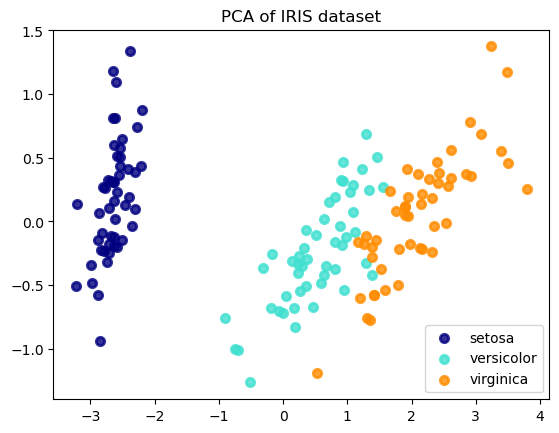

In [5]:
# Plotting the PCA
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

## Training and testing set
Use *train_test_split()*, a function from the sklearn library.

In [6]:
from sklearn.model_selection import train_test_split

# Create training petal_data, training labels, test petal_data, test lables using train_test_split()
# Test size set to 60%, so more data is being used for testing than training
data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=0.6, random_state=10)

print(data_train[:10], '\n')
print(data_test[:10], '\n')

print(label_train[:10], '\n')
print(label_test[:10], '\n')

[[6.6 3.  4.4 1.4]
 [5.  3.4 1.5 0.2]
 [5.1 3.8 1.6 0.2]
 [5.1 3.5 1.4 0.3]
 [6.5 3.  5.8 2.2]
 [5.8 2.7 5.1 1.9]
 [6.1 2.8 4.  1.3]
 [5.5 2.4 3.8 1.1]
 [6.5 3.2 5.1 2. ]
 [6.5 3.  5.2 2. ]] 

[[6.3 2.3 4.4 1.3]
 [6.4 2.7 5.3 1.9]
 [5.4 3.7 1.5 0.2]
 [6.1 3.  4.6 1.4]
 [5.  3.3 1.4 0.2]
 [5.  2.  3.5 1. ]
 [6.3 2.5 4.9 1.5]
 [5.8 2.7 4.1 1. ]
 [5.1 3.4 1.5 0.2]
 [5.7 2.8 4.5 1.3]] 

[1 0 0 0 2 2 1 1 2 2] 

[1 2 0 1 0 1 1 1 0 1] 



## Classifying the data using different models

### 1) Gaussian Naive Bayes 

In [7]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(data_train, label_train)

# Assign the predicted labels to the variable pred_NB
pred_NB = gnb.predict(data_test)

print('true:', label_test)
print('pred:', pred_NB )

print("Number of mislabeled points out of a total %d points : %d" % (data_test.shape[0], (label_test != pred_NB).sum()))

true: [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2 0 1 1 0 2 2 2
 2 2 0 1 2 1 0 2 1 1 0 0 0 1 2 2]
pred: [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 2 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 2 0 2 2 2 2 1 2 1 1 1 0 0 1 0 2 0 0 1 1 2 0 2 0 1 2 0 2 2 2
 2 2 0 1 2 1 0 2 1 1 0 0 0 1 2 2]
Number of mislabeled points out of a total 90 points : 6


### 2) K Nearest Neighbours 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore") #for suppresson of FutureWarning

n = 15
clf = KNeighborsClassifier(n_neighbors=n, weights='uniform')
clf.fit(data_train, label_train)

# Assign the predicted labels to the variable pred_KNN
pred_KNN = clf.predict(data_test)

print('true:', label_test)
print('pred:', pred_KNN)
print("Number of mislabeled points out of a total {} points : {}".format(data_test.shape[0], (label_test != pred_KNN).sum()))

true: [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2 0 1 1 0 2 2 2
 2 2 0 1 2 1 0 2 1 1 0 0 0 1 2 2]
pred: [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 2 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 2 0 2 2 2 2 1 2 1 1 1 0 0 1 0 2 0 0 1 1 2 0 2 0 1 2 0 2 2 2
 2 2 0 1 2 1 0 2 1 1 0 0 0 1 2 2]
Number of mislabeled points out of a total 90 points : 7


### 3) Support Vector Machine 

In [9]:
from sklearn import svm

clf = svm.SVC()
clf.fit(data_train[:,[0,1]], label_train)

# Assign the predicted labels to the variable pred_SVM
pred_SVM = clf.predict(data_test[:,[0,1]])

print('true:', label_test)
print('pred:', pred_SVM)

print("Number of mislabeled points out of a total {} points : {}".format(data_test.shape[0], (label_test != pred_SVM).sum()))

true: [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2 0 1 1 0 2 2 2
 2 2 0 1 2 1 0 2 1 1 0 0 0 1 2 2]
pred: [1 2 0 2 0 1 2 1 0 1 1 1 1 0 0 2 2 0 0 0 2 2 2 0 2 0 1 1 2 2 2 2 2 1 2 0 2
 2 2 2 0 0 1 1 2 0 2 2 1 2 1 2 1 2 2 0 0 2 0 2 0 0 1 1 2 0 2 0 1 1 0 2 2 2
 2 2 0 1 2 1 0 2 2 1 0 0 0 0 2 2]
Number of mislabeled points out of a total 90 points : 20


## Assess the performance of the models
Use *classification_report()*, a function from sklearn library which builds a text report showing the main classification metrics.

**Precision:** When it predicts the positive result, how often is it correct? 
(i.e., proportion of predicted positives that truly are positives)

**Recall:** When it is actually the positive result, how often does it predict correctly? (i.e., true positive rate)

**F1-Score:** Harmonic mean of precision and recall, penalising large discrepancies between the two.

**Accuracy:** How often is the classifier correct? 

In [10]:
from sklearn.metrics import classification_report

### 1) Gaussian Naive Bayes 

In [11]:
print(classification_report(label_test, pred_NB, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.96      0.84      0.90        32
   virginica       0.85      0.97      0.91        30

    accuracy                           0.93        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.93      0.93        90



### 2) K Nearest Neighbours

In [12]:
print(classification_report(label_test, pred_KNN, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.96      0.81      0.88        32
   virginica       0.83      0.97      0.89        30

    accuracy                           0.92        90
   macro avg       0.93      0.93      0.92        90
weighted avg       0.93      0.92      0.92        90



### 3) Support Vector Machine 

In [13]:
print(classification_report(label_test, pred_SVM, target_names=target_names))

              precision    recall  f1-score   support

      setosa       0.96      0.96      0.96        28
  versicolor       0.77      0.53      0.63        32
   virginica       0.65      0.87      0.74        30

    accuracy                           0.78        90
   macro avg       0.80      0.79      0.78        90
weighted avg       0.79      0.78      0.77        90

